# Deep Q-Network (DQN)
---
In this notebook, you will implement a DQN agent with OpenAI Gym's LunarLander-v2 environment.

Use Command Below to install dependencies:

pip install swig

pip install box2d

pip install pygame

### 1. Import the Necessary Packages

In [1]:
pip install swig

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install box2d

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install pygame

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Instantiate the Environment and Agent

Initialize the environment in the code cell below.

In [5]:
env = gym.make('LunarLander-v2')
env.seed(0)
print('State shape: ', env.observation_space.shape)
print('Number of actions: ', env.action_space.n)

State shape:  (8,)
Number of actions:  4


/usr/local/lib/python3.8/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


First Try to understand the code in **Step 2** and **Step 3** of this notebook, along with the code in `Deep_Q_N.py` and `model.py`.  Once you have an understanding of how the different files work together, 
- Define your own deep Q-network in `model.py` that maps states to action values. You might need to introduce new variables.
- Finish the `learn` method in the `Agent` class in `Deep_Q_N.py`.  The sampled batch of experience tuples is already provided for you; you need only use the local and target Q-networks to compute the loss, before taking a step towards minimizing the loss.

Once you have completed the code in `Deep_Q_N.py` and `model.py`, run the code cell below.

In [6]:
from Deep_Q_N import Agent

# because of my system is macbook and unix based , this lines of code write here , 
# i dont know for windows os this lines of code needed or not . 
# but if the error happened , pls remove that :) 

#------------------------------------------
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"
#----------------------------

agent = Agent(state_size=8, action_size=4, seed=0)

# watch an untrained agent
state = env.reset()
for j in range(200):
    action = agent.act(state)
    env.render()
    state, reward, done, _ = env.step(action)
    if done:
        break 
        
env.close()

/usr/local/lib/python3.8/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


### 3. Train the Agent with DQN

Run the code cell below to train the agent from scratch.  Amend the supplied values to get a better performence.

Episode 100	Average Score: -138.35
Episode 200	Average Score: -78.56
Episode 100	Average Score: -139.30
Episode 200	Average Score: -122.17
Episode 100	Average Score: -212.46
Episode 200	Average Score: -126.40
Episode 100	Average Score: -217.32
Episode 200	Average Score: -267.68
Episode 100	Average Score: -223.80
Episode 200	Average Score: -316.53


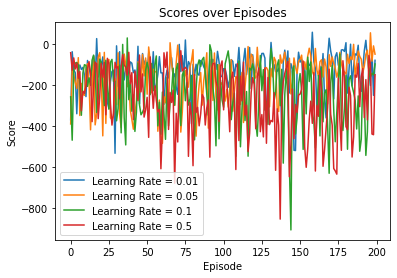

In [7]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=200.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

scores = dqn()

# plot the scores
# Your Code Here
# For different learning rates
learning_rates = [0.01, 0.05, 0.1, 0.5]

for lr in learning_rates:
    agent = Agent(state_size=8, action_size=4, seed=0, learning_rate=lr)
    scores = dqn()
    plt.plot(scores, label=f'Learning Rate = {lr}')

plt.xlabel('Episode')
plt.ylabel('Score')
plt.title('Scores over Episodes')
plt.legend()
plt.show()


رابطه بین تعداد به‌روزرسانی‌ها و مقدار نهایی امتیاز می‌تواند به عوامل مختلفی مانند نرخ یادگیری، ساختار شبکه عصبی و پیچیدگی محیط بستگی داشته باشد. ممکن است بین تعداد به‌روزرسانی‌ها و مقدار نهایی امتیاز رابطه وجود داشته باشد و می‌تواند انتقالی باشد که در آن افزایش تعداد به‌روزرسانی‌ها در ابتدا منجر به افزایش امتیاز می‌شود، اما پس از یک نقطه مشخص، امتیاز بالا می‌رود.
برای مشاهده رابطه بین تعداد به‌روزرسانی‌ها و مقدار نهایی امتیاز، می‌توانید تابع  
  را چندین بار با مقادیر مختلف   
اجرا کنید و میانگین امتیاز 100 قسمت گذشته را به عنوان تابعی از تعداد به روز رسانی ها، به عنوان مثال:



Episode 100	Average Score: -140.22
Episode 100	Average Score: -168.72
Episode 200	Average Score: -67.58
Episode 100	Average Score: -153.29
Episode 200	Average Score: -104.34
Episode 300	Average Score: -33.77
Episode 100	Average Score: -146.12
Episode 200	Average Score: -81.50
Episode 300	Average Score: -1.45
Episode 400	Average Score: 90.60


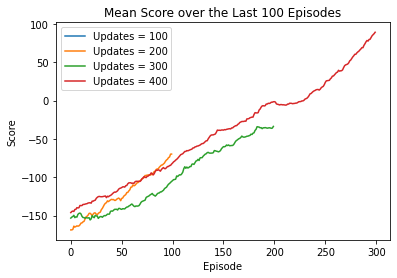

In [8]:
n_updates = [100, 200, 300, 400]

for updates in n_updates:
    agent = Agent(state_size=8, action_size=4, seed=0)
    scores = dqn(n_episodes=updates)
    mean_scores = [np.mean(scores[i-100:i]) for i in range(100, len(scores))]
    plt.plot(mean_scores, label=f'Updates = {updates}')

plt.xlabel('Episode')
plt.ylabel('Score')
plt.title('Mean Score over the Last 100 Episodes')
plt.legend()
plt.show()
